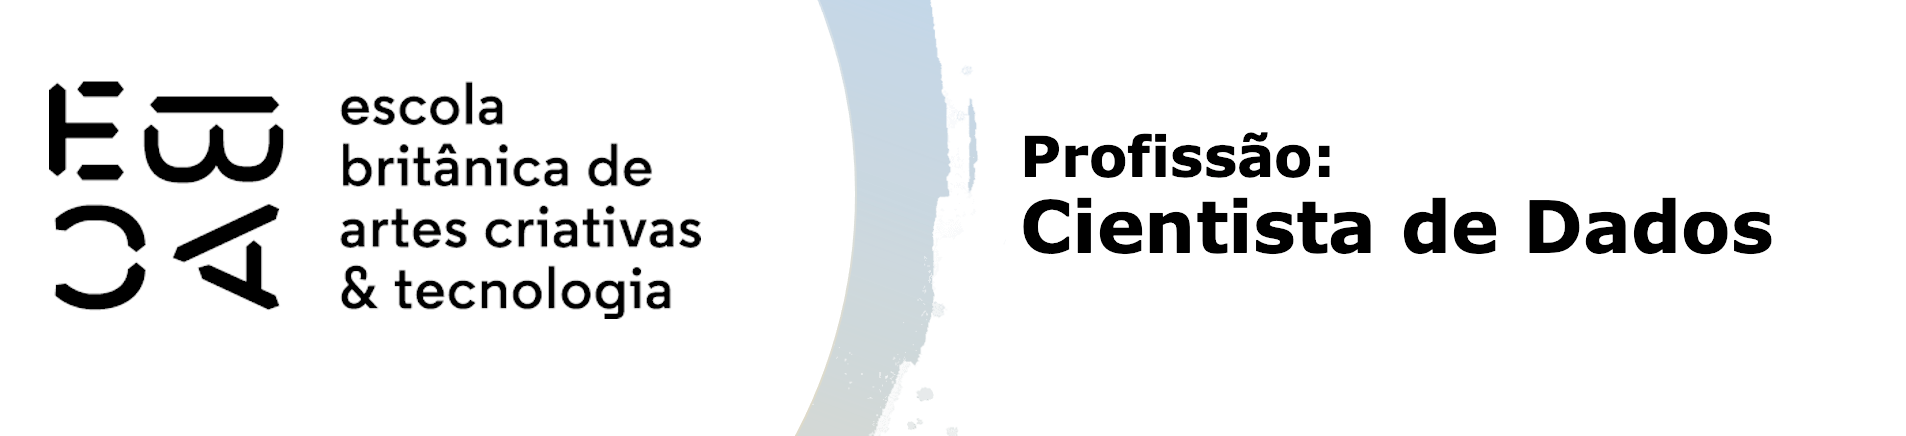

# Métodos hierárquicos de agrupamento - Tarefa

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc



#ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [68]:
peng = sns.load_dataset('penguins')
peng.index.name='id'
#1-2
peng_num = peng.select_dtypes('number').dropna()
#3
peng_pad = StandardScaler().fit_transform(peng_num)

In [78]:
#4
def agrupamento_hierarquico(df:pd.DataFrame, n_clusters:int=3):
    
    df_num = df.select_dtypes('number').dropna()    
    df_pad = StandardScaler().fit_transform(df_num)     
    clus = AgglomerativeClustering(linkage="complete", 
                                   distance_threshold=None, 
                                   n_clusters=n_clusters)
    clus.fit(df_pad)    
     
    df_num['grupo'] = clus.labels_
    df_agrupado = df.merge(df_num['grupo'], how='left', on=df.index.name)
    
    return df_agrupado

In [79]:
peng_agrupado = agrupamento_hierarquico(peng,3)
peng_agrupado.grupo.value_counts()

grupo
1.0    165
0.0    123
2.0     54
Name: count, dtype: int64

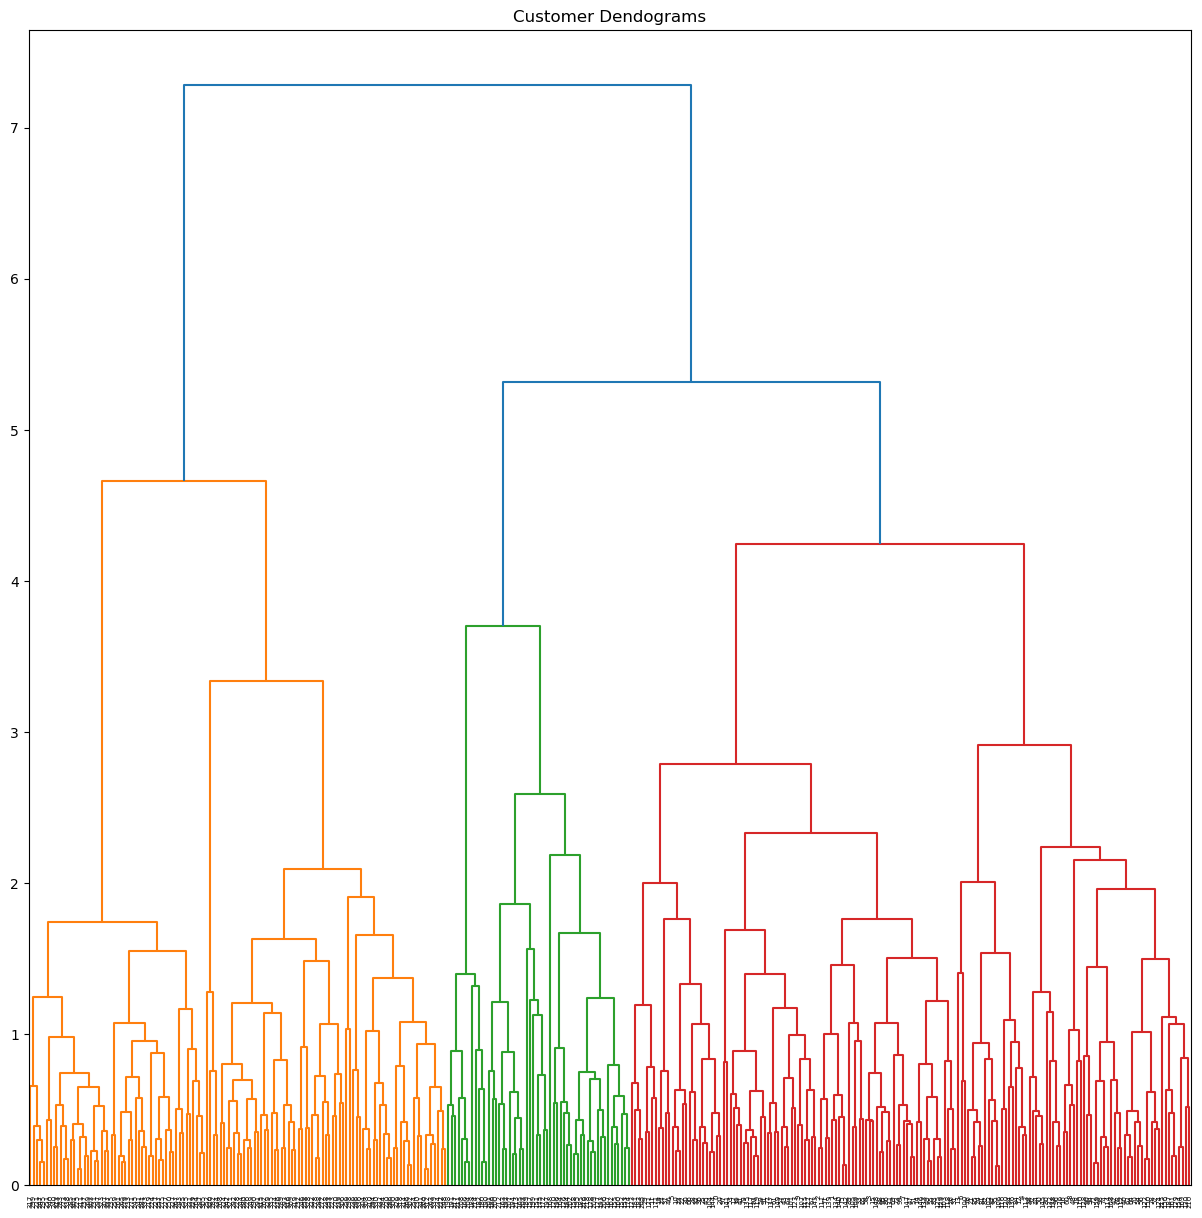

In [74]:
#5
plt.figure(figsize=(15, 15))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(peng_pad, method='complete'))

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [76]:
pd.crosstab(peng_agrupado['species'], peng_agrupado['grupo'])

grupo,0.0,1.0,2.0
species,,,
Adelie,0,151,0
Chinstrap,0,14,54
Gentoo,123,0,0


In [92]:
pd.crosstab([peng_agrupado['species'], peng_agrupado['sex']], peng_agrupado['grupo'])

grupo             0.0  1.0  2.0
species   sex                  
Adelie    Female    0   73    0
          Male      0   73    0
Chinstrap Female    0   14   20
          Male      0    0   34
Gentoo    Female   58    0    0
          Male     61    0    0

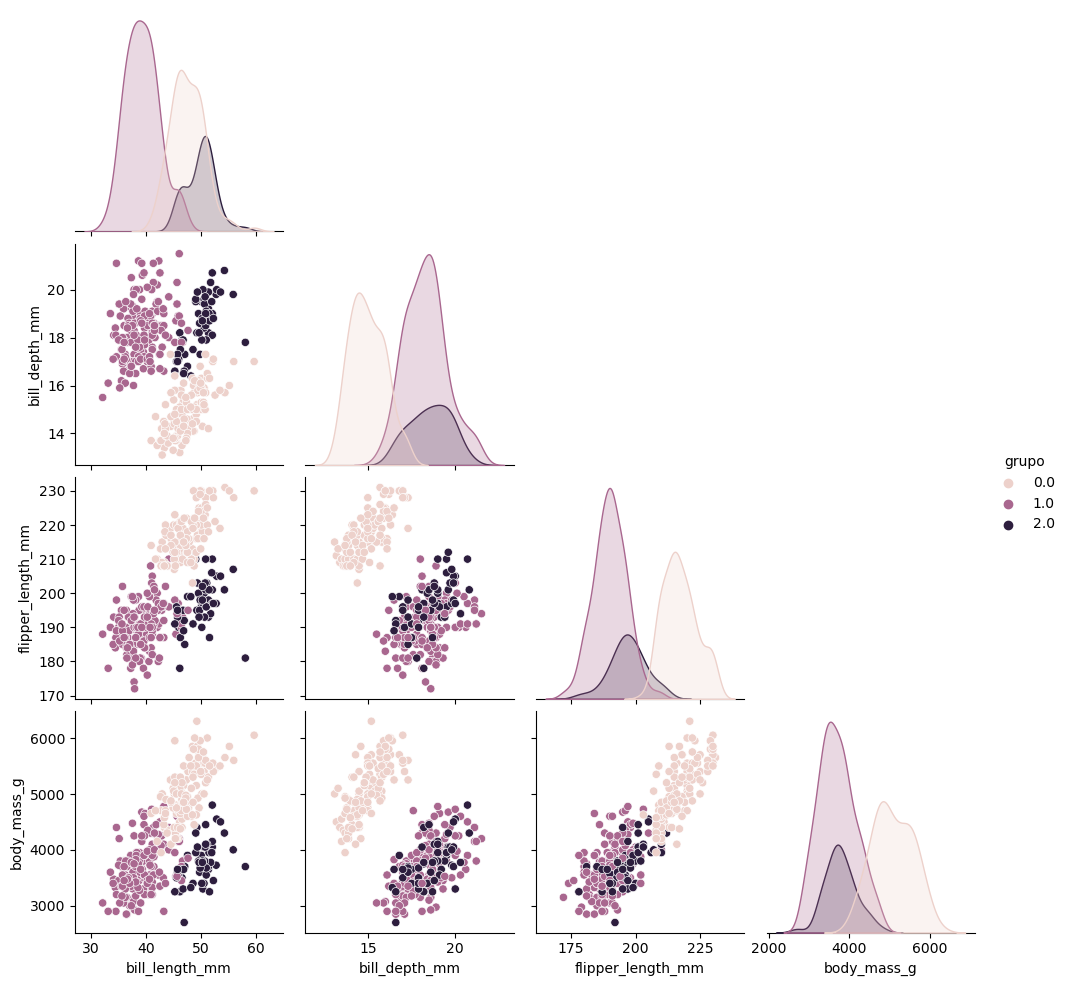

In [77]:
sns.pairplot(data=peng_agrupado, hue='grupo', corner=True)

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

In [91]:
#avaliando em 5 grupos
df_grupo5 = agrupamento_hierarquico(peng, 5)


In [89]:
pd.crosstab(df_grupo5['species'], df_grupo5['grupo'])

grupo,0.0,1.0,2.0,3.0,4.0
species,,,,,
Adelie,0,0,60,0,91
Chinstrap,54,0,9,0,5
Gentoo,0,71,0,52,0


In [90]:
pd.crosstab([df_grupo5['species'], df_grupo5['sex']], df_grupo5['grupo'])

grupo             0.0  1.0  2.0  3.0  4.0
species   sex                            
Adelie    Female    0    0    4    0   69
          Male      0    0   55    0   18
Chinstrap Female   20    0    9    0    5
          Male     34    0    0    0    0
Gentoo    Female    0    9    0   49    0
          Male      0   61    0    0    0

**Avaliação**  
Na análise em `5 grupos` o modelo conseguiu classificar de forma bem aproximada os pinguins da espécie `Chinstrap`, as demais espécies há um desvio que caracteriza de forma errada os machos e fêmeas, a análise com `3 grupos` corresponde melhor aos dados.